# UMA Projekt
### Miłosz Cieśla, Filip Ryniewicz

In [6]:
import sys
sys.path.append('../')

## Przygotowanie danych

In [7]:
from ucimlrepo import fetch_ucirepo
import numpy as np

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
X = np.array(X.values)
Y = np.array(breast_cancer_wisconsin_diagnostic.data.targets.Diagnosis)
Y = Y == "M"

### Podział na Zbiór treningowy i testowy

In [8]:
from sklearn.model_selection import train_test_split
import torch
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Trenowanie modeli

### Perceptron wielowarstwowy

In [ ]:
from models.mlp import MLP
from time import perf_counter

mlp_model = MLP()
mlp_start_time = perf_counter()
mlp_model.train(X_train_tensor, y_train_tensor)
mlp_train_time = perf_counter() - mlp_start_time

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

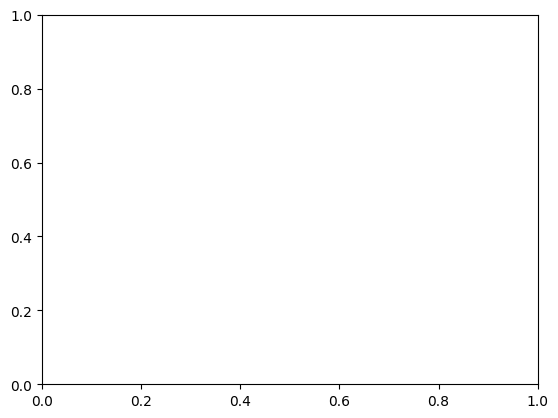

In [21]:
from sklearn.model_selection import KFold
from eval_techniques import *
import torch
import matplotlib.pyplot as plt

epoch_lens = list(range(1, 500)[::50])
error_rates = [] * len(epoch_lens)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
  X_train_cv, X_test_cv = X[train_index], X[test_index]
  y_train_cv, y_test_cv = Y[train_index], Y[test_index]
  X_train_cv_tensor = torch.tensor(X_train_cv, dtype=torch.float32)
  y_train_cv_tensor = torch.tensor(y_train_cv, dtype=torch.float32).view(-1, 1)
  X_test_cv_tensor = torch.tensor(X_test_cv, dtype=torch.float32)
  y_test_cv_tensor = torch.tensor(y_test_cv, dtype=torch.float32).view(-1, 1)
  for i, epoch_len in enumerate(epoch_lens):
    mlp_model = MLP(train_epochs=epoch_len)
    mlp_model.train(X_train_cv_tensor, y_train_cv_tensor)
    mlp_predictions = mlp_model.predict(X_test_cv_tensor)
    mlp_predictions = mlp_predictions >= 0.5
    error_rates[i].append(error_rate(mlp_predictions, y_test_cv))

error_rates = [np.mean(error_rate) for error_rate in error_rates]

plt.plot(epoch_lens, error_rates)
plt.xlabel("Number of epochs")
plt.ylabel("Error rate")
plt.title("Error rate vs. Number of epochs")
plt.show()

[np.float64(0.2982456140350877), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.03508771929824561), np.float64(0.0), np.float64(0.0), np.float64(0.017543859649122806), np.float64(0.017543859649122806), np.float64(0.017543859649122806), np.float64(0.03508771929824561), np.float64(0.38596491228070173), np.float64(0.08771929824561403), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.10526315789473684), np.float64(0.08771929824561403), np.float64(0.05263157894736842), np.float64(0.08771929824561403), np.float64(0.3508771929824561), np.float64(0.07017543859649122), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.07017543859649122), np.float64(0.07017543859649122), np.float64(0.05263157894736842), np.float64(0.03508771929824561), np.float64(0.07017543859649122), np.float64(0.0), np.float64(0.2982456140350877), np.float64(0.03508771929

### K najbliższych sąsiadów

In [5]:
from models.knn import KNN
from time import perf_counter

knn_model = KNN(n_neighbors=10)
knn_start_time = perf_counter()
knn_model.train(X_train, y_train)
knn_train_time = perf_counter() - knn_start_time


### Las losowy

In [ ]:
from models.random_forest import RandomForest
from time import perf_counter

rf_model = RandomForest(n_estimators=100)
rf_start_time = perf_counter()
rf_model.train(X_train, y_train)
rf_train_time = perf_counter() - rf_start_time


### Czasy trenowania

In [7]:
import pandas as pd
data = {"MLP": [mlp_train_time], "KNN": [knn_train_time], "Random Forest": [rf_train_time]}
df = pd.DataFrame(data, index=["Training Time"])
df

,MLP,KNN,Random Forest
Training Time,0.028839,0.000506,0.057027


## Predykcje modeli

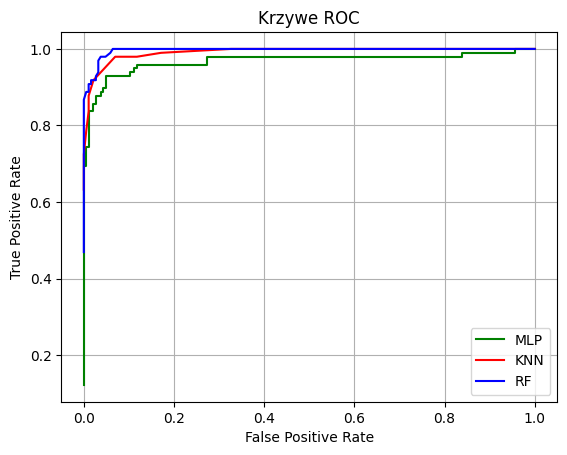

In [8]:
from eval_techniques import *
mlp_predictions = mlp_model.predict(X_test_tensor)
knn_predictions = knn_model.predict(X_test_tensor)
rf_predictions = rf_model.predict(X_test_tensor)
tpr, fpr = [0, 0, 0], [0, 0, 0]
tpr[0], fpr[0] = roc_curve(mlp_predictions, y_test)
tpr[1], fpr[1] = roc_curve(knn_predictions, y_test)
tpr[2], fpr[2] = roc_curve(rf_predictions, y_test)
plot_roc_curve(tpr, fpr)

In [9]:
predicted = model.predict(X_test)
correct = 0
for y_pred, y_real in zip(predicted, y_test):
    if y_pred == y_real:
        correct += 1
    print(f"KNN Predicted: {y_pred}, Real: {y_real}")

NameError: name 'model' is not defined